In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

1 :


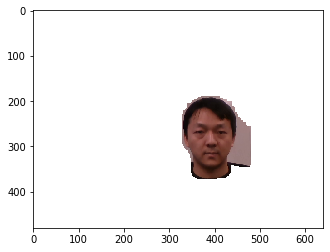

2 :


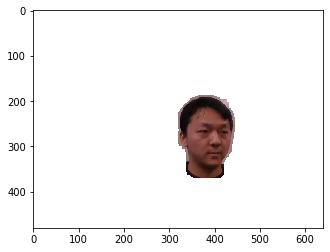

3 :


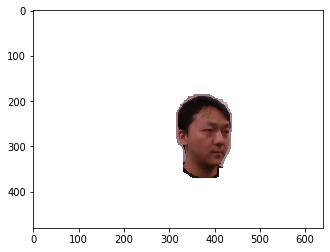

4 :


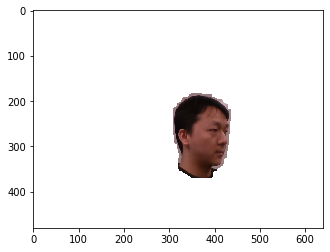

5 :


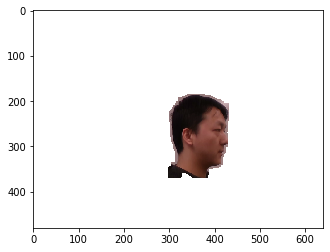

6 :


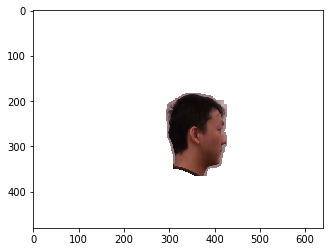

7 :


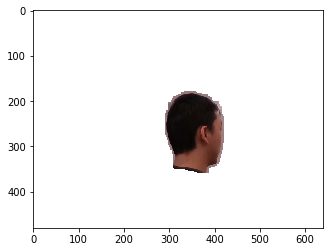

8 :


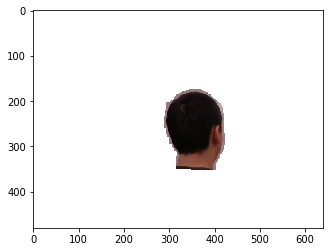

9 :


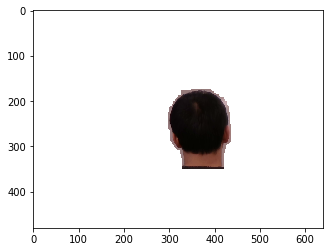

10 :


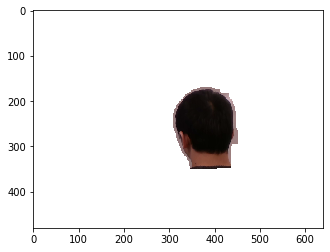

11 :


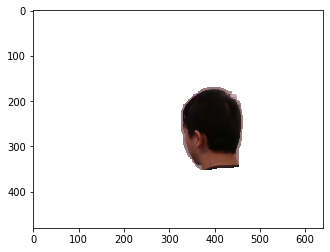

12 :


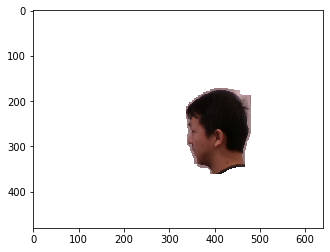

13 :


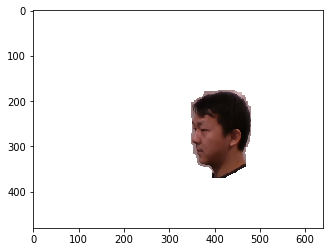

14 :


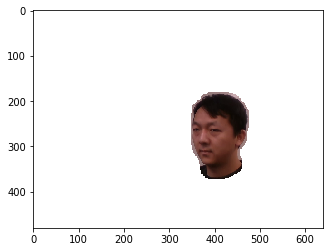

15 :


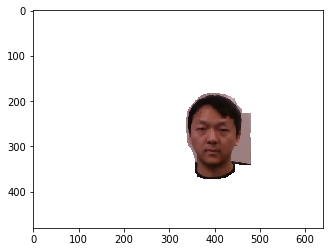

<Figure size 432x288 with 0 Axes>

In [2]:
# test edge_based_filter
for j in range(1,16):
    print(j,":")
    image = cv2.imread('./head_2d_image/full_1_{}.png'.format(j))
    edge = cv2.Canny(image,0,250)
#     blurred = cv2.GaussianBlur(image, (3,3), 0)
    
#     edge = cv2.Canny(blurred,0,250)
#     plt.imshow(edge);plt.show()
    for i in range (2):
        _, contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        image_another = image.copy()
        cv2.drawContours(image_another, contours, -1, (255,0,0), -1)
        edge = cv2.Canny(image_another,0,250)

#     plt.imshow(edge);plt.show()
    edge[:,480:]=0
    edge[:,:260]=0
    kernel = np.ones((3,3))
    dilation = cv2.dilate(edge,kernel,iterations =1)
    dilation[:150,:]=0
    dilation[370:,:]=0
    dilation[:,480:]=0
    dilation[:,:260]=0
    im_floodfill = binary_fill_holes(dilation)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)

#     kernel = np.ones((8,8))
    erode = cv2.erode(im_floodfill,kernel,iterations=10)
    kernel = np.ones((5,5))
    dilation = cv2.dilate(erode,kernel,iterations =6)
    image = image.reshape(-1,3)
    dilation = dilation.reshape(-1,1)
    for i,ps in enumerate(image):
        image[i] = dilation[i] * ps
        if dilation[i] == 0:
            image[i] = [255,255,255]
    
    image = image.reshape(480,640,3)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    plt.imshow(image);plt.show()
    plt.imsave("head_2d_image/head_11_{}.png".format(j),image)
    plt.clf()

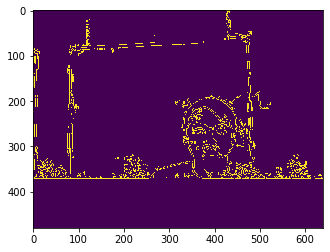

(307200,)
(26676,)
dangling removal done
color filter done.


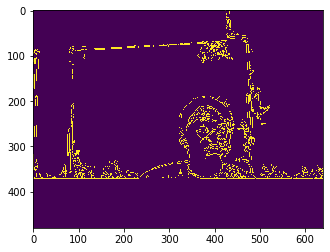

(307200,)
(22965,)
dangling removal done
color filter done.


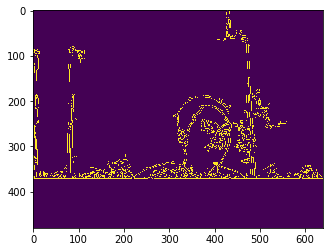

(307200,)
(24913,)
dangling removal done
color filter done.


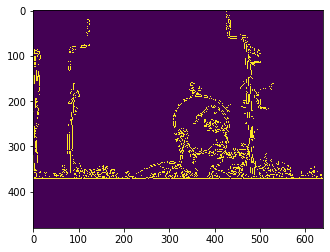

(307200,)
(26953,)
dangling removal done
color filter done.


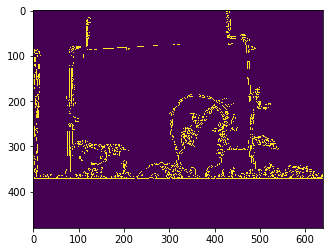

(307200,)
(24274,)
dangling removal done
color filter done.


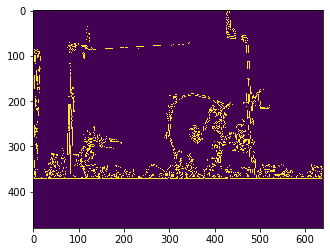

(307200,)
(29866,)
dangling removal done
color filter done.


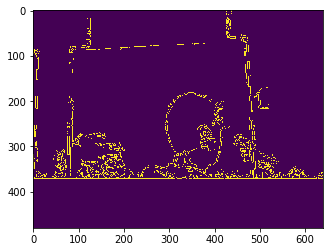

(307200,)
(23573,)
dangling removal done
color filter done.


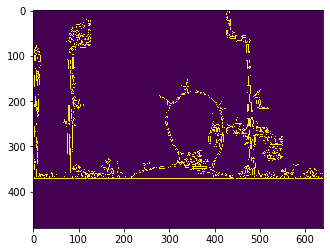

(307200,)
(23633,)
dangling removal done
color filter done.


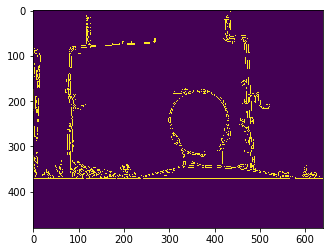

(307200,)
(23414,)
dangling removal done
color filter done.


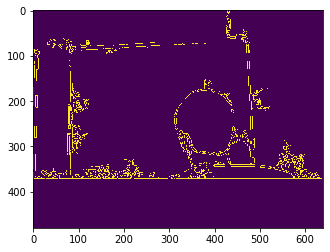

(307200,)
(23517,)
dangling removal done
color filter done.


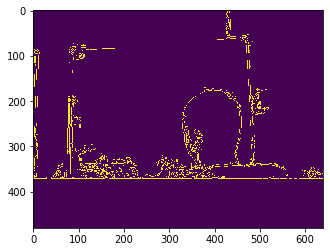

(307200,)
(24496,)
dangling removal done
color filter done.


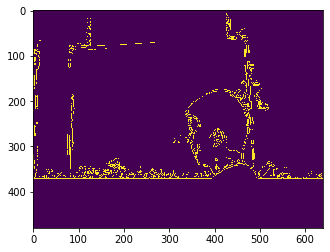

(307200,)
(24302,)
dangling removal done
color filter done.


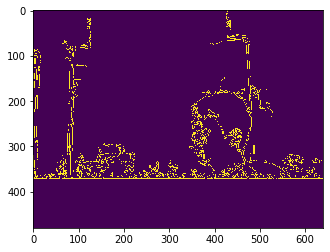

(307200,)
(24376,)
dangling removal done
color filter done.


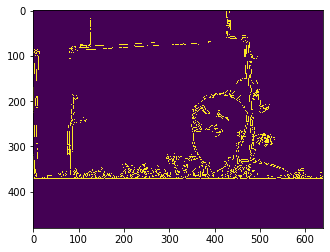

(307200,)
(25204,)
dangling removal done
color filter done.


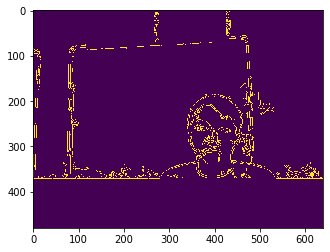

(307200,)
(25002,)
dangling removal done
color filter done.


In [30]:
# gen 2d images
for i in range(1,16):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.reset_filters()
    # self.reset_filters()
    head.edge_based_filter()
    head.filter_nan()
    head.filter_depth(1.5)
    head.sparsify(1)
#     head.remove_dangling()
    print("dangling removal done")
#     head.remove_background_color()
    print("color filter done.")
    head.center()
    head.get_filtered_image()
    head.create_vpython_spheres()
    head.save()

In [2]:
# gen pickled heads
for i in range(1,16):
    print(i)
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.full_filter()
    head.get_filtered_image()

1
(307200,)
depth filter done.
dangling removal done
color filter done.
2
(307200,)
depth filter done.
dangling removal done
color filter done.
3
(307200,)
depth filter done.
dangling removal done
color filter done.
4
(307200,)
depth filter done.
dangling removal done
color filter done.
5
(307200,)
depth filter done.
dangling removal done
color filter done.
6
(307200,)
depth filter done.
dangling removal done
color filter done.
7
(307200,)
depth filter done.
dangling removal done
color filter done.
8
(307200,)
depth filter done.
dangling removal done
color filter done.
9
(307200,)
depth filter done.
dangling removal done
color filter done.
10
(307200,)
depth filter done.
dangling removal done
color filter done.
11
(307200,)
depth filter done.
dangling removal done
color filter done.
12
(307200,)
depth filter done.
dangling removal done
color filter done.
13
(307200,)
depth filter done.
dangling removal done
color filter done.
14
(307200,)
depth filter done.
dangling removal done
color 

In [2]:
# load heads
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [3]:
# make head from first to last
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
#     heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        print("join {}, {}".format(i-1-first,i-first))
        heads.join_heads_wraper(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=1) 
    print ("completed")
    return heads

In [4]:
make_mhead(all_heads,0,1)

[<DMatch 0x1a25d77df0>, <DMatch 0x1a25d77e30>, <DMatch 0x1a25d803b0>, <DMatch 0x1a25d80ab0>, <DMatch 0x1a25d80db0>, <DMatch 0x1a25d80f50>, <DMatch 0x1a25d84170>, <DMatch 0x1a25d843d0>, <DMatch 0x1a25d845f0>, <DMatch 0x1a25d84890>, <DMatch 0x1a25d84990>, <DMatch 0x1a25d84fd0>, <DMatch 0x1a25d893d0>, <DMatch 0x1a25d89850>, <DMatch 0x1a25d89910>, <DMatch 0x1a25d89990>, <DMatch 0x1a25d89b10>, <DMatch 0x1a25d89d90>, <DMatch 0x1a25d8ea70>, <DMatch 0x1a25d8ed30>, <DMatch 0x1a25d93bb0>, <DMatch 0x1a25d96a70>, <DMatch 0x1a25d96df0>, <DMatch 0x1a25d9b690>, <DMatch 0x1a25d9bc30>, <DMatch 0x1a2964c2d0>]
ids are not unique
[1.08787478+0.32129345j 1.08787478-0.32129345j 1.01983946+0.j        ] R is: [[ 1.02746657 -0.06453694 -0.47088247]
 [ 0.01096914  1.00074029 -0.11561993]
 [ 0.24852214 -0.06950411  1.16738217]]
0 min_error 100000 params: [ 0.04 10.    1.6 ]
[<DMatch 0x1a25d84990>, <DMatch 0x1a25d84090>, <DMatch 0x1a25d84e10>, <DMatch 0x1a25d89210>, <DMatch 0x1a25d894f0>, <DMatch 0x1a25d89870>, <

In [ ]:
make_mhead(all_heads,0,1)